# Seaborn

Es un modulo de ploteo de graficos estadisticos que esta construida sobre matplotlib.

Lo interesante de este modulo es que, ademas de mostrar graficos estadisticos interesantes con muy poco codigo, es que funciona muy bien con dataframes de pandas.

[repositorio del codigo](https://github.com/mwaskom/seaborn)

[documentacion de seaborn](https://seaborn.pydata.org/)

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
sns.set_style('darkgrid')

#### Datasets

In [ ]:
# seaborn viene con un conjunto de dataframes para cargar y explorar

#['anscombe','attention','brain_networks','car_crashes','dots','exercise','flights',
# 'fmri','gammas','iris','planets','tips','titanic']

In [5]:
df = sns.load_dataset('tips')

In [6]:
df.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

In [7]:
df.shape

(244, 7)

## Tipos de datos

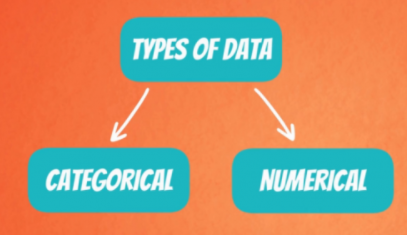

----

## Ploteos de distribucion

Utilizan variables numericas y muestran la distribucion de las mismas

### distplot
Nos muestra la distribucion de una variable numerica a traves de un histograma

c:\program files\python37\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


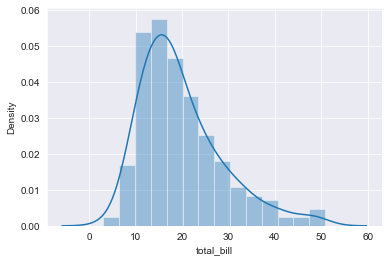

In [8]:
sns.distplot(df['total_bill'])
#kde = kernel density estimation

c:\program files\python37\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


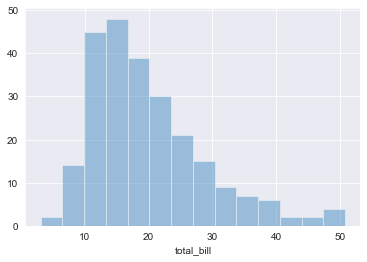

In [9]:
sns.distplot(df['total_bill'],kde=False)

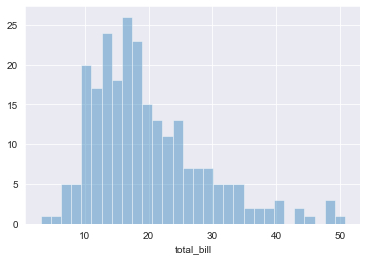

In [10]:
# podemos cambiar la cantidad de bins para mas informacion
sns.distplot(df['total_bill'],kde=False,bins=30)

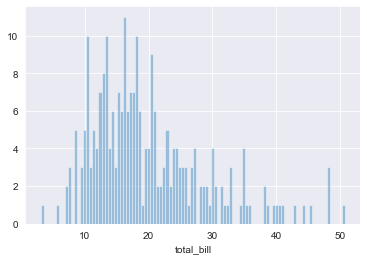

In [11]:
sns.distplot(df['total_bill'],kde=False,bins=100)

### jointplot
Nos muestra un grafico bivariable (entre dos variables numericas) y ademas un grafico distplot de cada una.

Podemos elegir el tipo de grafico entre ellas:

* “scatter” 
* “reg” 
* “resid” 
* “kde” 
* “hex”


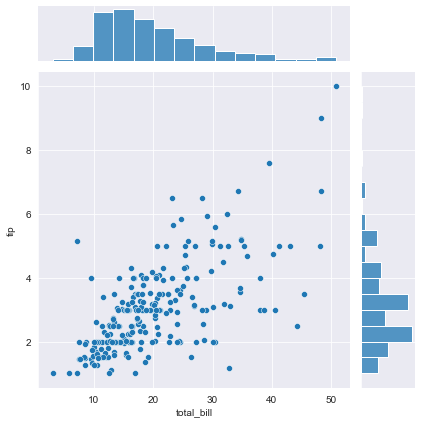

In [12]:
sns.jointplot(x='total_bill',y='tip',data=df)

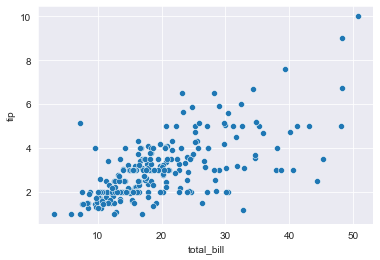

In [13]:
#plt.figure(figsize=(15,15))
sns.scatterplot(x='total_bill',y='tip',data=df)

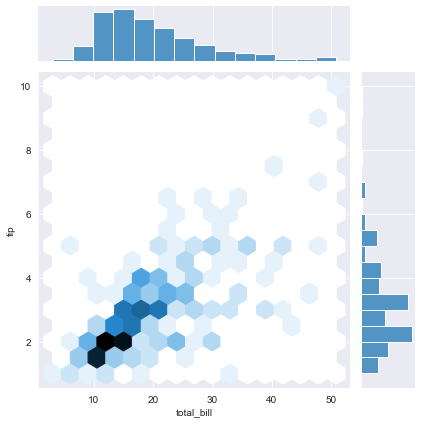

In [14]:
# que pasa si no quiero el scatter plot y quiero otro
sns.jointplot(x='total_bill',y='tip',data=df,kind='hex')

### pairplot
Nos permite graficar las relaciones bivariables a traves de todas las variables **numericas** del dataframe y ademas soporta el parametro **hue** para las columnas categoricas.

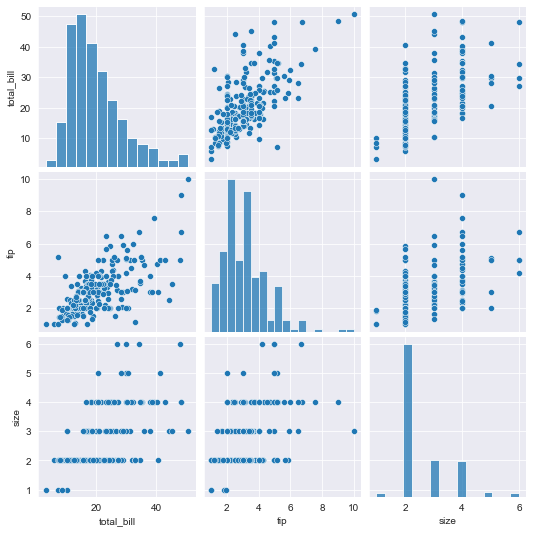

In [15]:
sns.pairplot(df)

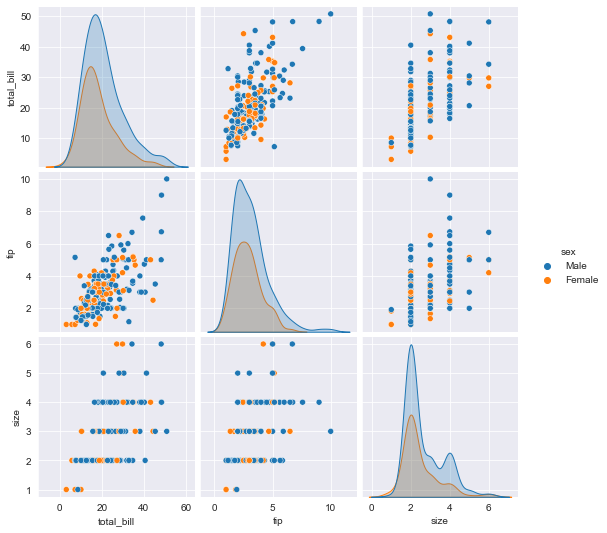

In [16]:
sns.pairplot(df,hue='sex')

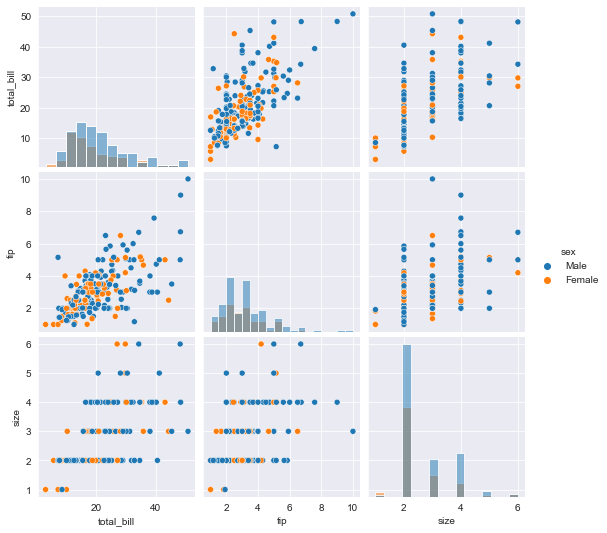

In [17]:
sns.pairplot(df,hue='sex',diag_kind='hist')

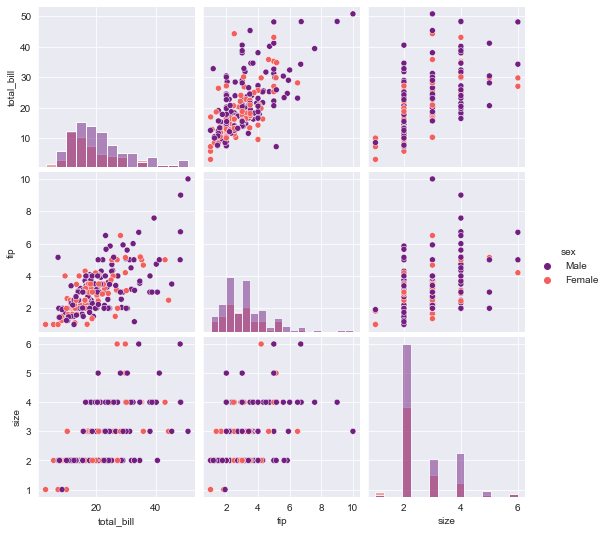

In [22]:
sns.pairplot(df,hue='sex',diag_kind='hist',palette='magma')

**histplot**

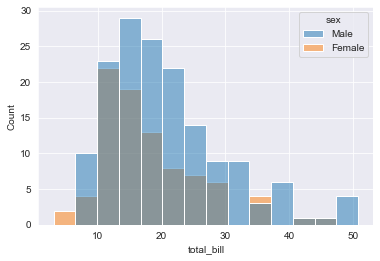

In [26]:
sns.histplot(x='total_bill',data=df,hue='sex')

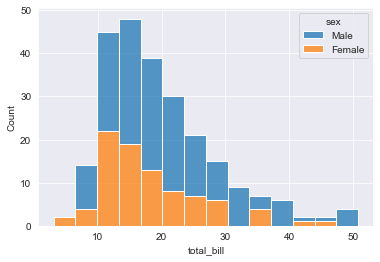

In [25]:
sns.histplot(x='total_bill',data=df,hue='sex',multiple="stack")

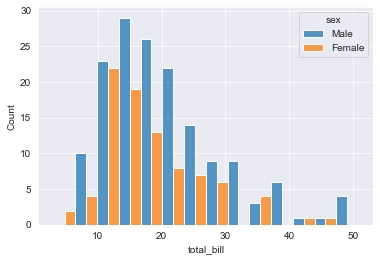

In [28]:
sns.histplot(x='total_bill',data=df,hue='sex',multiple="dodge")

In [ ]:
# y si queremos poner uno al lado del otro?
# ahora lo vemos en grids

----

## Ploteos categoricos

Ploteos para trabajar con variables categoricas

### barplot
Nos permite graficar variables categoricas, usando una funcion de agregacion sobre otra variable (generalmente numerica), por defecto esta funcion de agregacion es la media.

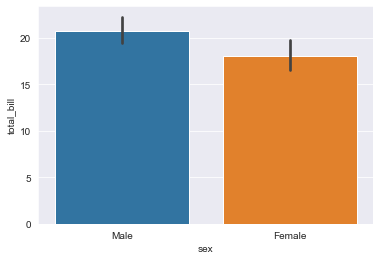

In [47]:
sns.barplot(data=df,x='sex',y='total_bill')

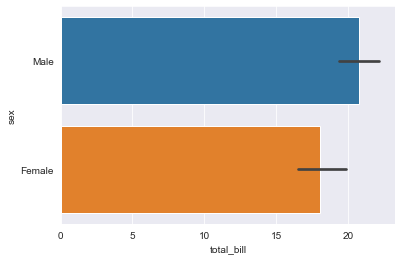

In [44]:
sns.barplot(data=df,y='sex',x='total_bill')

In [49]:
import numpy as np

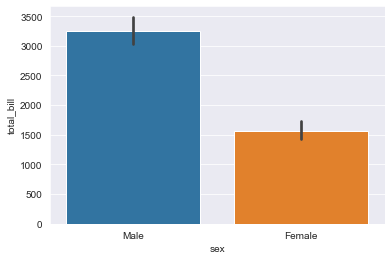

In [58]:
sns.barplot(data=df,x='sex',y='total_bill',estimator=np.sum)

### countplot
Es basicamente un grafico **barplot** pero que usa como funcion de agregacion la cuenta de la cantidad de datos que tenemos en esa variable.



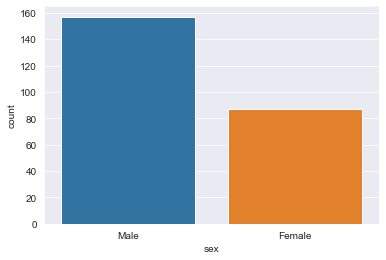

In [56]:
sns.countplot(data=df,x='sex')

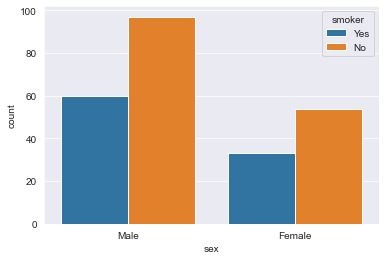

In [59]:
sns.countplot(data=df,x='sex',hue="smoker")

In [ ]:
# ver de resolver ese tema

In [71]:
df_2 = df.groupby(['sex','smoker']).count()['size']

In [76]:
sum(df_2)

244

In [83]:
df_2.map(lambda x : (x/sum(df_2))*100)

sex     smoker
Male    Yes       24.590164
        No        39.754098
Female  Yes       13.524590
        No        22.131148
Name: size, dtype: float64

### boxplot

El diagrama de caja es un gráfico utilizado para representar una variable cuantitativa (variable numérica). El gráfico es una herramienta que permite visualizar, a través de los cuartiles, cómo es la distribución, su grado de asimetría, los valores extremos, la posición de la mediana, etc

Podemos extender la definicion para ver la distribucion de las variables categoricas (cualitativas)

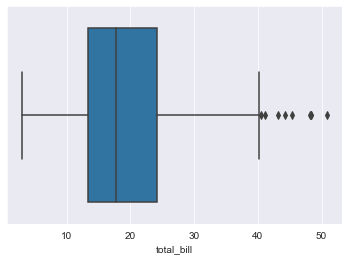

In [85]:
sns.boxplot(x='total_bill',data=df)

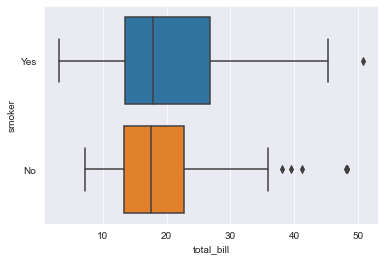

In [86]:
sns.boxplot(x='total_bill',y='smoker',data=df)

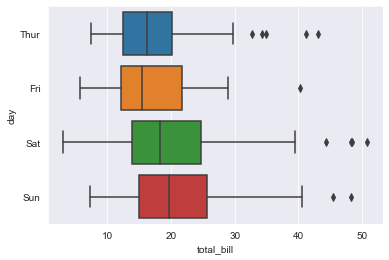

In [90]:
sns.boxplot(x='total_bill',y='day',data=df)

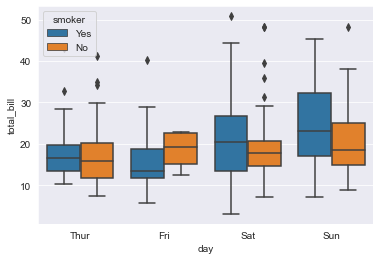

In [92]:
sns.boxplot(y='total_bill',x='day',data=df,hue='smoker')

### stripplot

Este grafico consiste en un scatterplot (grafico de puntos) pero en donde una de las variables es categorica

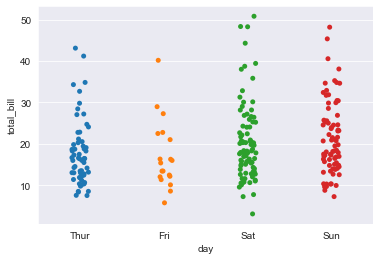

In [94]:
sns.stripplot(x="day", y="total_bill", data=df)

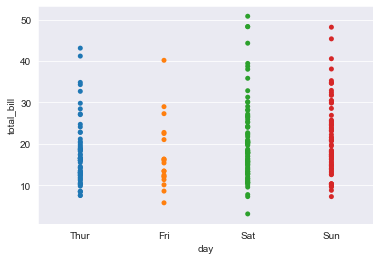

In [97]:
sns.stripplot(x="day", y="total_bill", data=df,jitter=False)

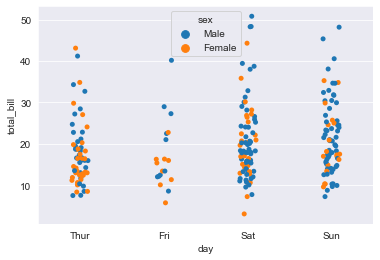

In [98]:
sns.stripplot(x="day", y="total_bill", data=df,hue='sex')

### catplot

Es la forma generalizada de construir un grafico categorico. Hay que pasarle que tipo de grafico queremos en el parametro `kind`.

Veamos unos ejemplos

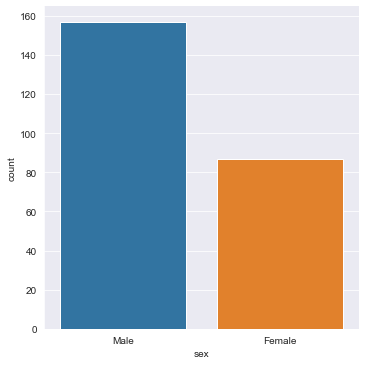

In [100]:
sns.catplot(x='sex',data=df,kind='count')

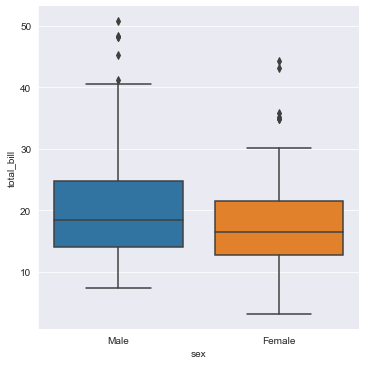

In [101]:
sns.catplot(x='sex',y='total_bill',data=df,kind='box')

----

## Ploteos matriciales

Nos permite hacer graficos matriciales, es decir, mostrar una matriz en un mapa de colores dependiendo de los valores de la misma.

### Heatmap

Para que este grafico funcione correctamente, los datos ya tienen que estar en formato de matriz numerica, y la funcion sns.heatmap() basicamente la colorea.

In [ ]:
# creamos una matriz de correlacion
# que nos va a indicar la correlacion entre las distintas variables numericas

In [102]:
df.corr()

total_bill       tip      size
total_bill    1.000000  0.675734  0.598315
tip           0.675734  1.000000  0.489299
size          0.598315  0.489299  1.000000

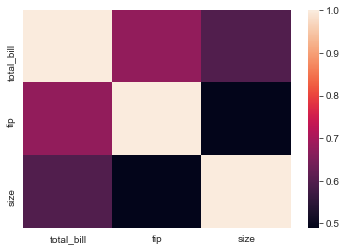

In [103]:
sns.heatmap(df.corr())

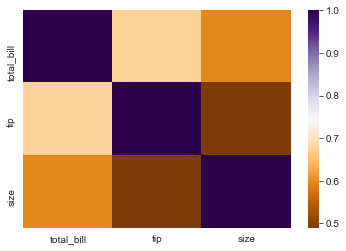

In [108]:
sns.heatmap(df.corr(),cmap='PuOr')

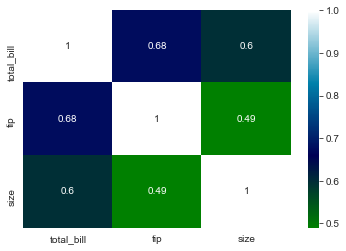

In [107]:
sns.heatmap(df.corr(),cmap='ocean',annot=True)

In [109]:
# si vamos bien de tiempo no dar este tema, porque no vimos pivot tables

In [110]:
flights = sns.load_dataset('flights')

In [111]:
flights.head()

year month  passengers
0  1949   Jan         112
1  1949   Feb         118
2  1949   Mar         132
3  1949   Apr         129
4  1949   May         121

In [112]:
flights.pivot_table(values='passengers',index='month',columns='year')

year   1949  1950  1951  1952  1953  1954  1955  1956  1957  1958  1959  1960
month                                                                        
Jan     112   115   145   171   196   204   242   284   315   340   360   417
Feb     118   126   150   180   196   188   233   277   301   318   342   391
Mar     132   141   178   193   236   235   267   317   356   362   406   419
Apr     129   135   163   181   235   227   269   313   348   348   396   461
May     121   125   172   183   229   234   270   318   355   363   420   472
Jun     135   149   178   218   243   264   315   374   422   435   472   535
Jul     148   170   199   230   264   302   364   413   465   491   548   622
Aug     148   170   199   242   272   293   347   405   467   505   559   606
Sep     136   158   184   209   237   259   312   355   404   404   463   508
Oct     119   133   162   191   211   229   274   306   347   359   407   461
Nov     104   114   146   172   180   203   237   271   305   310   362   390
Dec     118   140   166   194   201   229   278   306   336   337   405   432

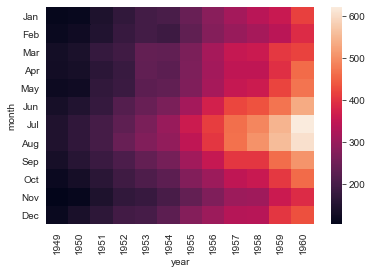

In [113]:
pvflights = flights.pivot_table(values='passengers',index='month',columns='year')
sns.heatmap(pvflights)

## Cuadriculas - Grillas

Permiten hacer varios graficos a la vez en distintas grillas

### PairGrid

Crea una grilla para rellenar con graficos bivariables del dataset, para variables numericas.


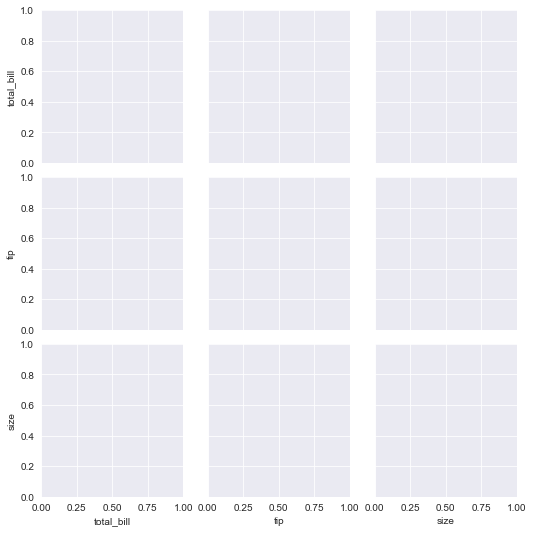

In [114]:
sns.PairGrid(df)

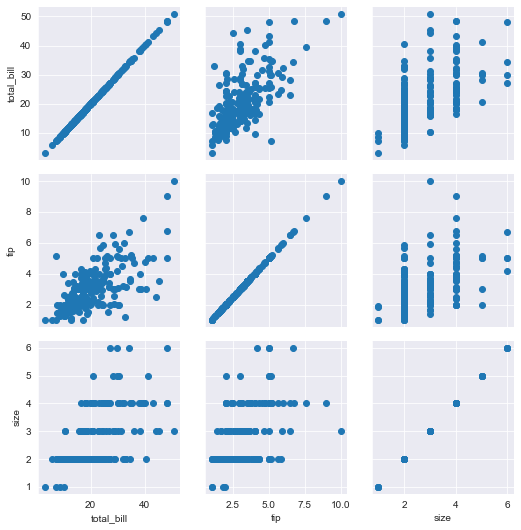

In [115]:
# una vez creada la girlla podemos mapear graficos sobre la misma

g = sns.PairGrid(df)
g.map(plt.scatter)

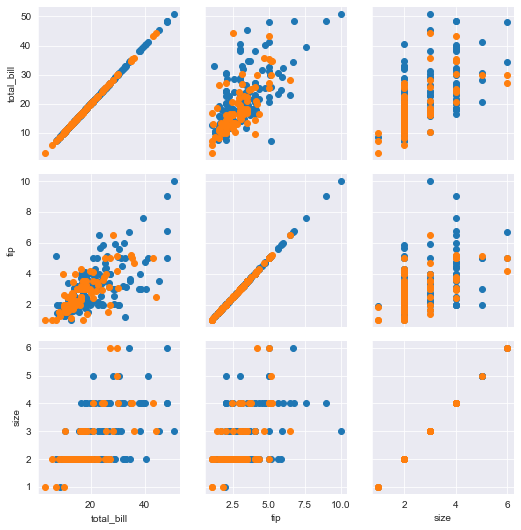

In [116]:
g = sns.PairGrid(df,hue='sex')
g.map(plt.scatter)

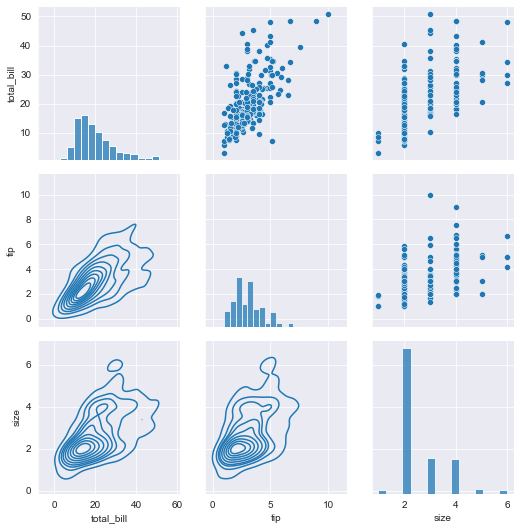

In [120]:
# Puedo mapear las distintas regiones de la grilla
g = sns.PairGrid(df,palette='coolwarm')
g.map_diag(sns.histplot)
g.map_upper(sns.scatterplot)
g.map_lower(sns.kdeplot)

### Facet Grid

Es una forma general de crear grillas para graficos basados en un campo en particular, con relacion a otros.

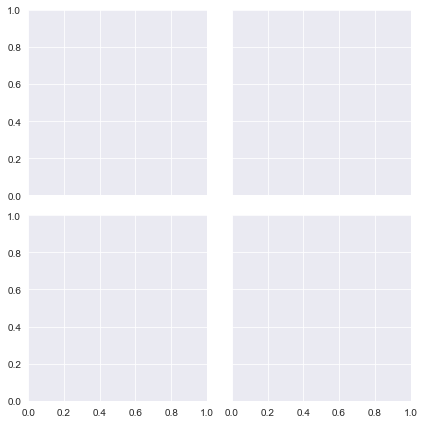

In [122]:
g = sns.FacetGrid(df, col="time", row="smoker")

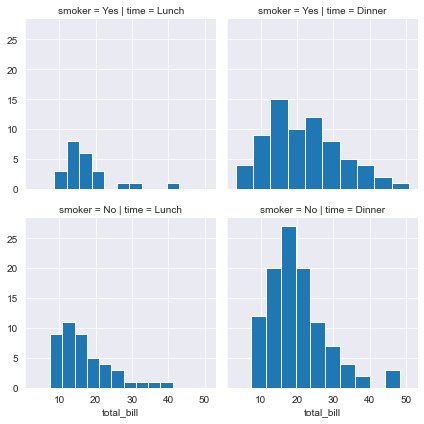

In [124]:
g = sns.FacetGrid(df, col="time",  row="smoker")
g = g.map(plt.hist, "total_bill")

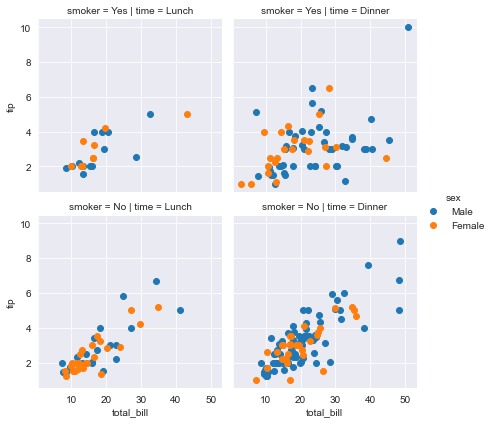

In [127]:
g = sns.FacetGrid(df, col="time",  row="smoker",hue='sex')
g = g.map(plt.scatter, "total_bill", "tip").add_legend()

**volvamos a nuestro ejemplo de histogramas**

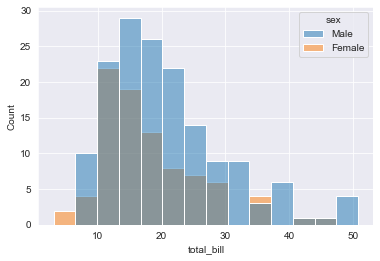

In [128]:
sns.histplot(x='total_bill',data=df,hue='sex')

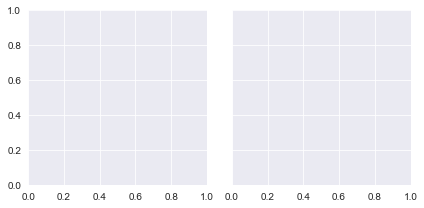

In [41]:
sns.FacetGrid(data=df,col="sex")

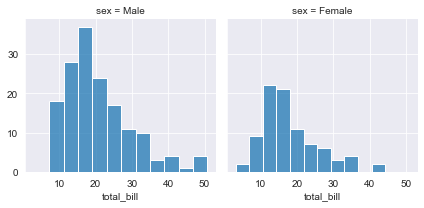

In [42]:
g = sns.FacetGrid(data=df,col="sex")
g.map(sns.histplot,'total_bill')

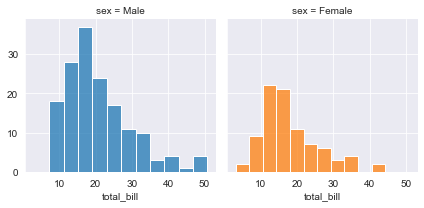

In [130]:
g = sns.FacetGrid(data=df,col="sex",hue='sex')
g.map(sns.histplot,'total_bill')

## Estilos y colores

Veamos un poco mas de seaborn para personalizar nuestros graficos

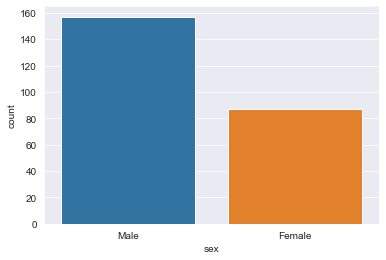

In [131]:
sns.countplot(x='sex',data=df)

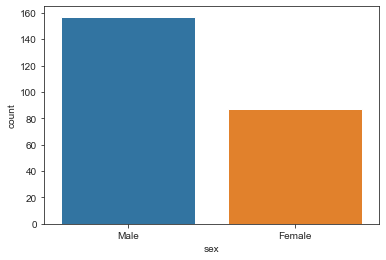

In [135]:
# cambiar el estilo de los graficos
sns.set_style('ticks')
# {darkgrid, whitegrid, dark, white, ticks}
sns.countplot(x='sex',data=df)

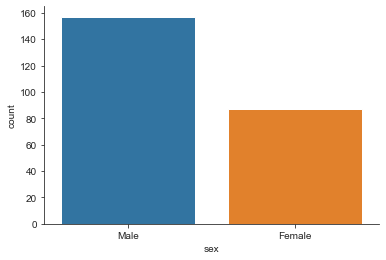

In [136]:
sns.countplot(x='sex',data=df)
sns.despine()

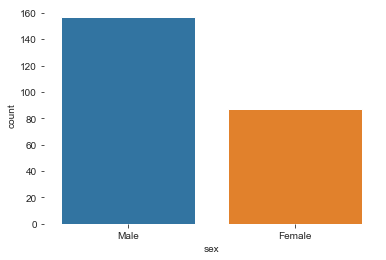

In [137]:
sns.countplot(x='sex',data=df)
sns.despine(left=True,bottom=True)

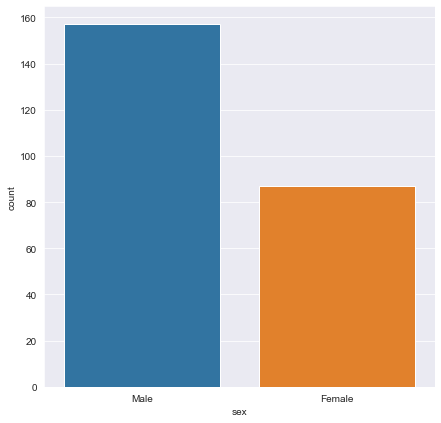

In [138]:
# cambiar el tamano de la imagen
plt.figure(figsize=(7,7))
sns.set_style('darkgrid')
sns.countplot(x='sex',data=df)

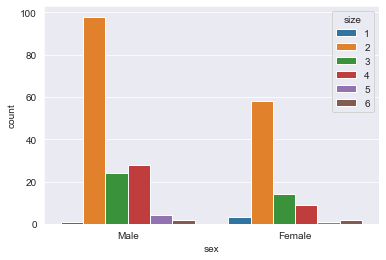

In [141]:
# palettes and colors
sns.countplot(x='sex',data=df,hue="size")

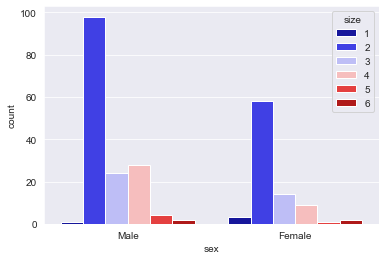

In [142]:
sns.countplot(x='sex',data=df,hue="size",palette='seismic')

https://matplotlib.org/tutorials/colors/colormaps.html